# About Seaborn

There are 3 level plots here:
- relplot 
    - scatterplot (kind='scatter')
    - lineplot (kind='line')

- distplot
    - histplot (kind='hist')
    - kdeplot (kind='kde')
    - ecdfplot (kind='ecdf')
    - rugplot (rug=True)

- catplot
    - stripplot (kind='strip')
    - swarmplot (kind='swarm')
    - boxplot (kind='box')
    - violinplot (kind='violin')
    - boxenplot (kind='boxen')
    - pointplot (kind='point')
    - barplot (kind='bar')
    - countplot (kind='count')

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Set a style
sns.set_style('darkgrid')

In [2]:
# Load the data
data_url = 'data/EPA_fuel_economy_summary.csv'

df = pd.read_csv(data_url)

# Preview the data
df.head()

,make,model,year,transmission,drive,date_range,fuel_type_summary,class_summary,cylinders,displ,co2,barrels08,fuelCost08,highway08,city08,comb08
0,Acura,NSX,2000,Automatic,2WD,2000-2010,Gas,Car,6.0,3.0,-1,18.311667,2600,22,15,18
1,Acura,NSX,2000,Manual,2WD,2000-2010,Gas,Car,6.0,3.2,-1,18.311667,2600,22,15,18
2,BMW,M Coupe,2000,Manual,2WD,2000-2010,Gas,Car,6.0,3.2,-1,17.347895,2500,23,17,19
3,BMW,Z3 Coupe,2000,Automatic,2WD,2000-2010,Gas,Car,6.0,2.8,-1,17.347895,2500,24,17,19
4,BMW,Z3 Coupe,2000,Manual,2WD,2000-2010,Gas,Car,6.0,2.8,-1,17.347895,2500,24,17,19


## Distplot

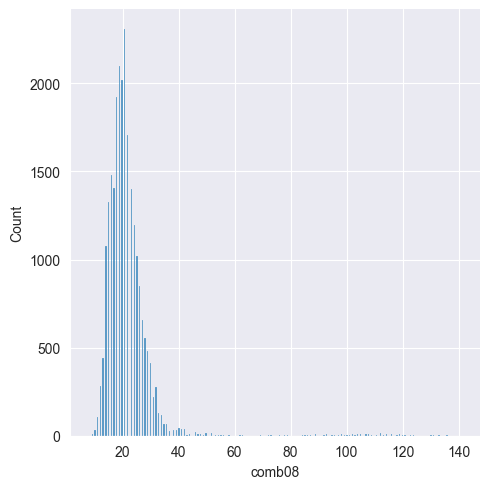

In [3]:
sns.displot(data=df, x='comb08');

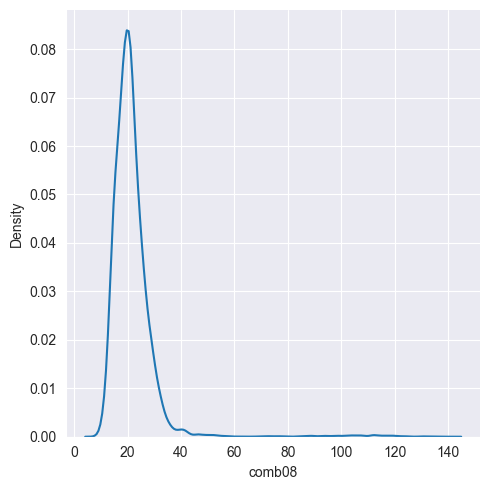

In [4]:
sns.displot(data=df, x='comb08', kind='kde');

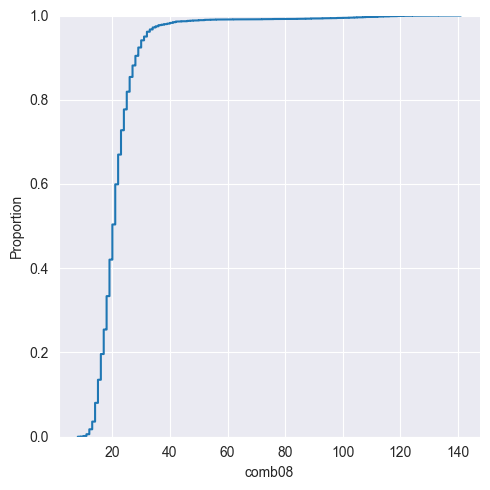

In [5]:
sns.displot(data=df, x='comb08', kind='ecdf');

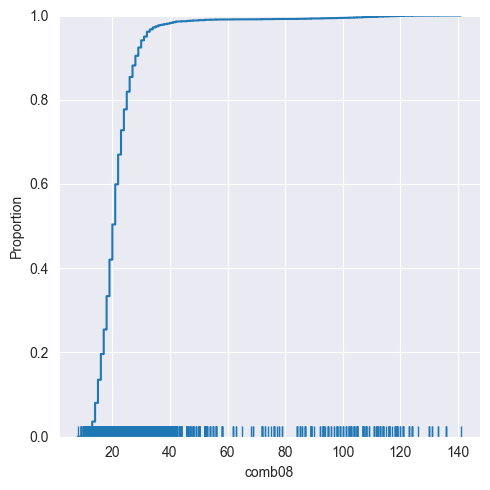

In [6]:
sns.displot(data=df, x='comb08', kind='ecdf', rug=True);

## Catplot

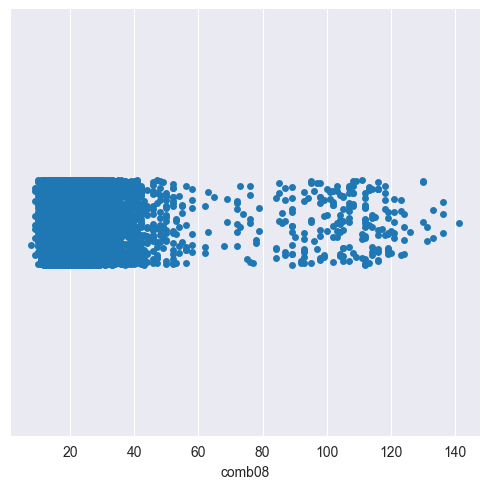

In [7]:
sns.catplot(data=df, x='comb08');

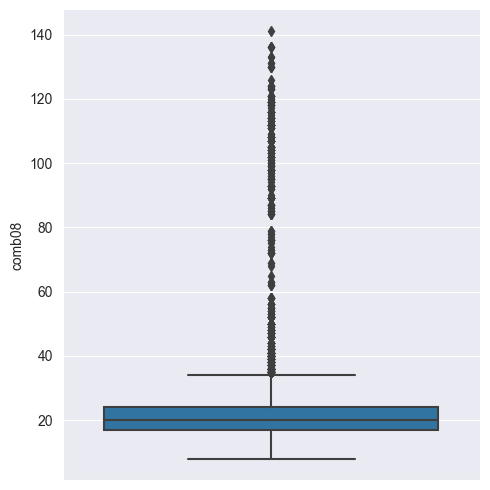

In [8]:
sns.catplot(data=df, y='comb08', kind='box');

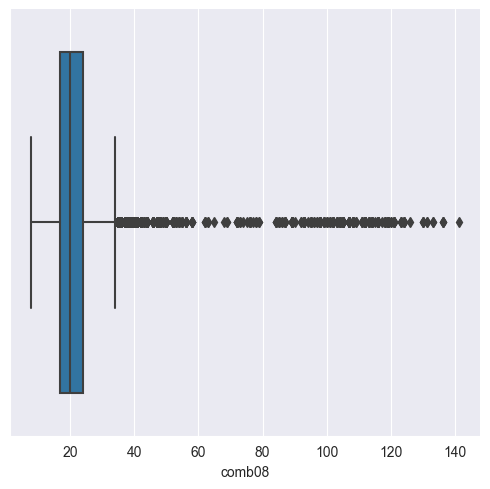

In [9]:
sns.catplot(data=df, x='comb08', kind='box');

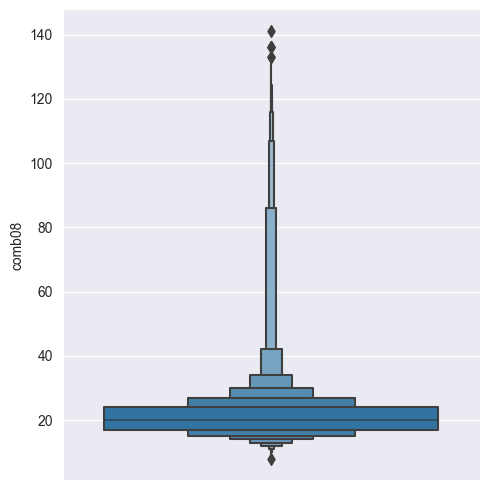

In [10]:
sns.catplot(data=df, y='comb08', kind='boxen');

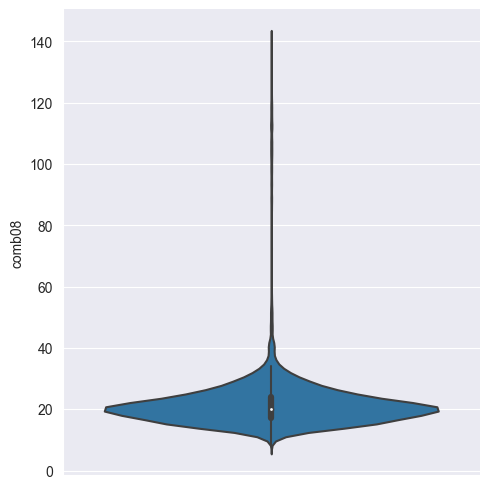

In [11]:
sns.catplot(data=df, y='comb08', kind='violin');

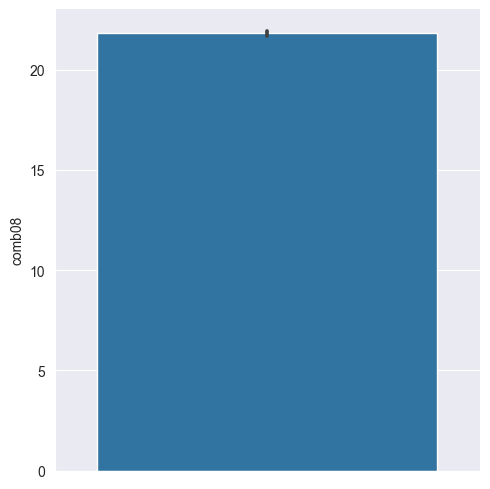

In [12]:
sns.catplot(data=df, y='comb08', kind='bar');

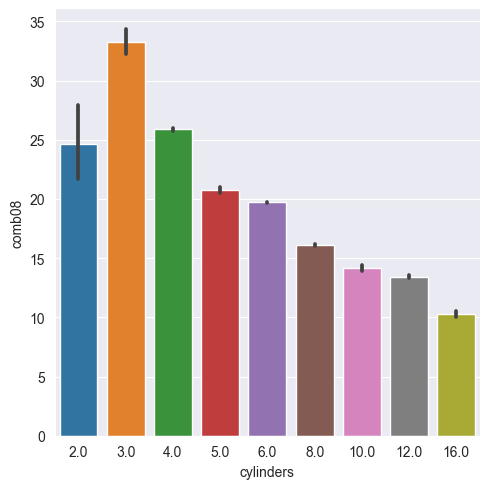

In [13]:
sns.catplot(data=df, y='comb08', 
            x='cylinders', kind='bar');

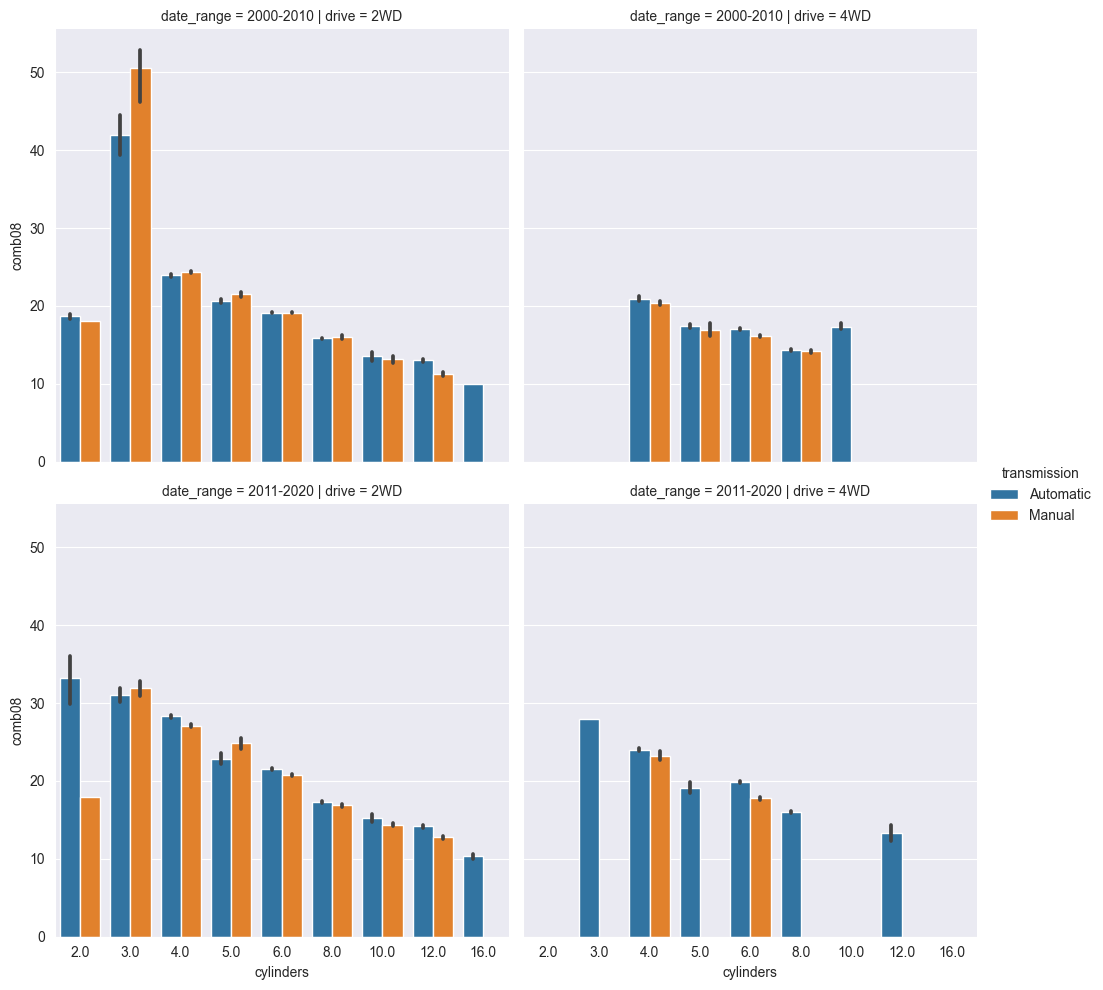

In [31]:
sns.catplot(data=df, y='comb08', x='cylinders', 
            col='drive', row='date_range', kind='bar', hue='transmission');

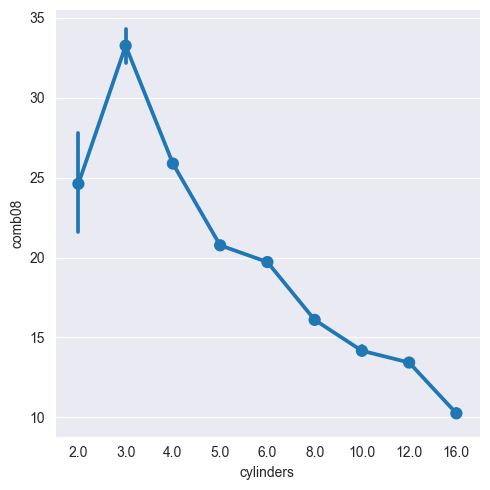

In [14]:
sns.catplot(data=df, y='comb08', 
            x='cylinders', kind='point');

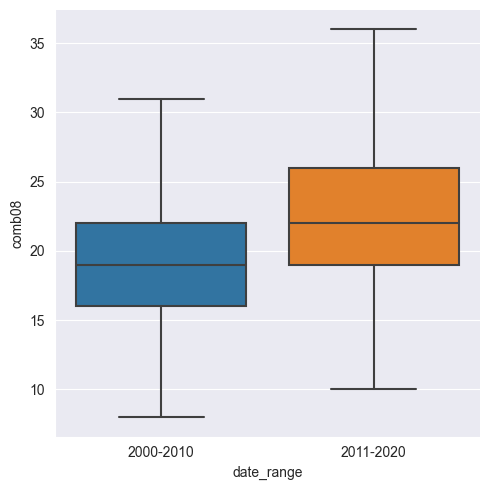

In [45]:
sns.catplot(data=df, 
            x='date_range',
            y='comb08',
            kind='box',
            showfliers=False
            );

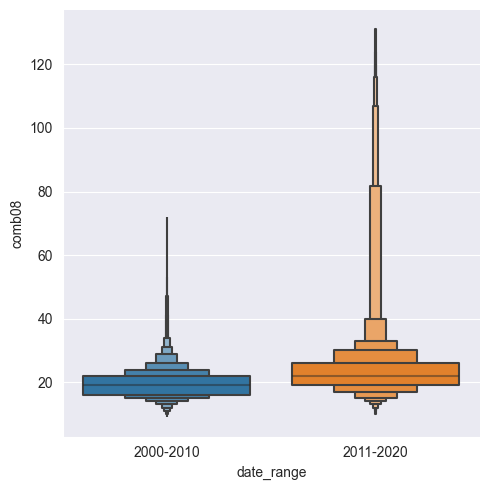

In [46]:
sns.catplot(data=df, 
            x='date_range',
            y='comb08',
            kind='boxen',
            showfliers=False
            );

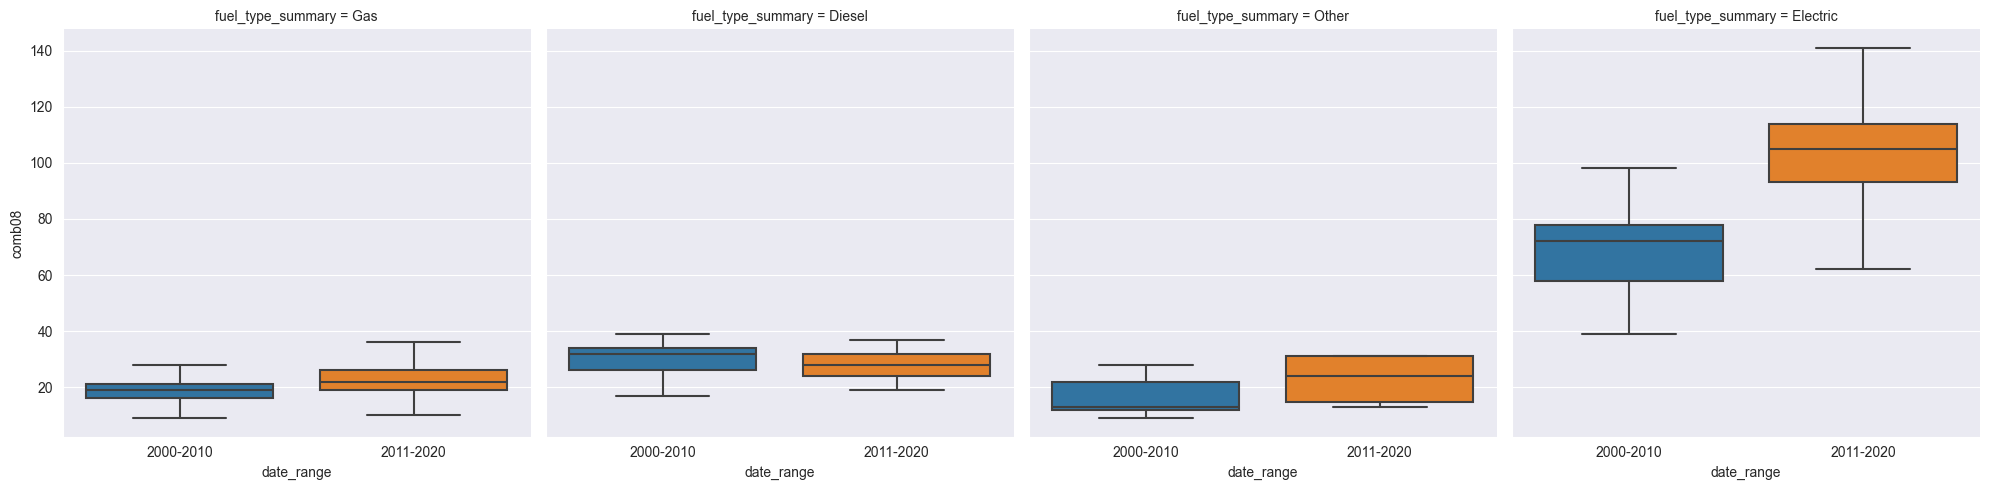

In [48]:
sns.catplot(data=df, 
            x='date_range',
            y='comb08',
            kind='box',
            col='fuel_type_summary',
            showfliers=False
            );

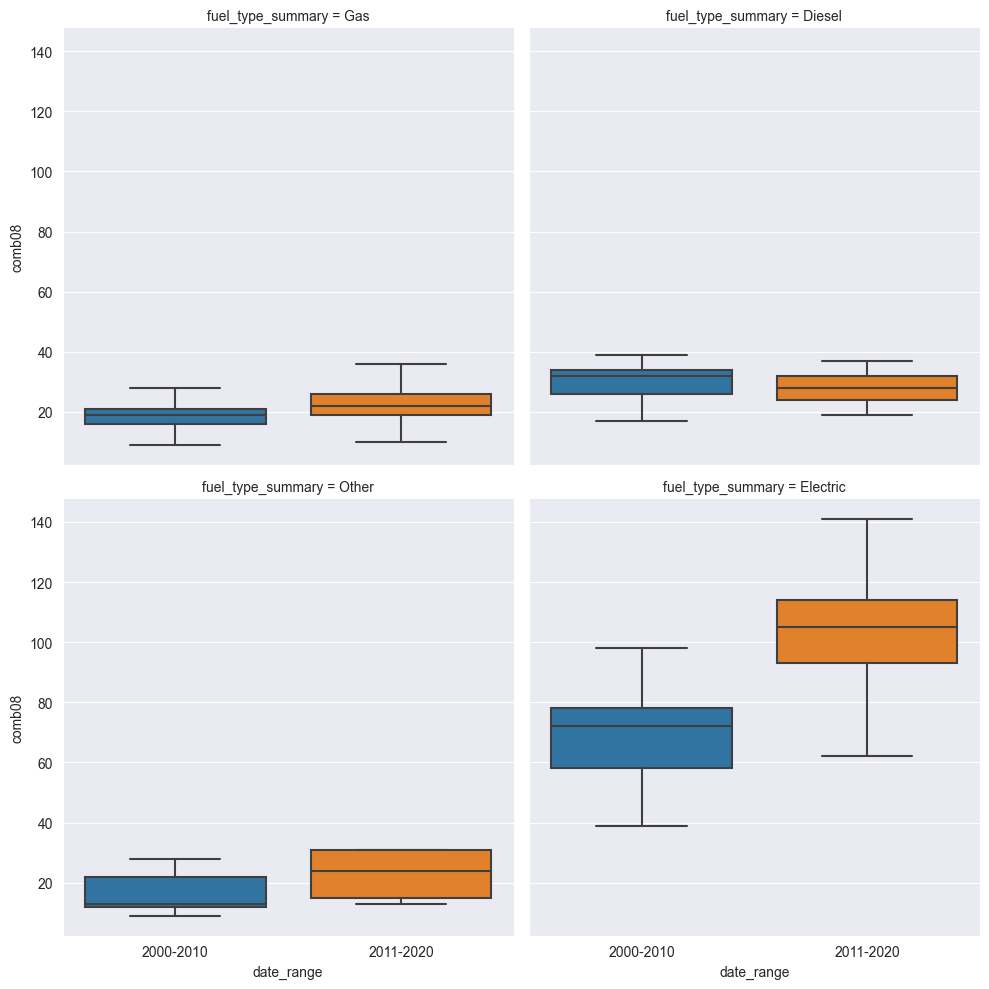

In [49]:
sns.catplot(data=df, 
            x='date_range',
            y='comb08',
            kind='box',
            col='fuel_type_summary',
            col_wrap=2,
            showfliers=False
            );

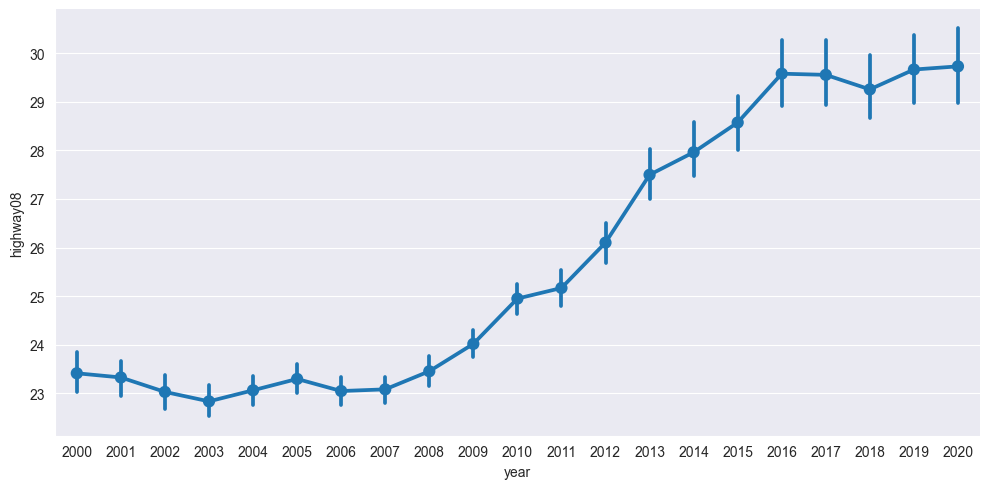

In [53]:
sns.catplot(data=df, x='year', y='highway08', 
            kind='point', aspect=2);

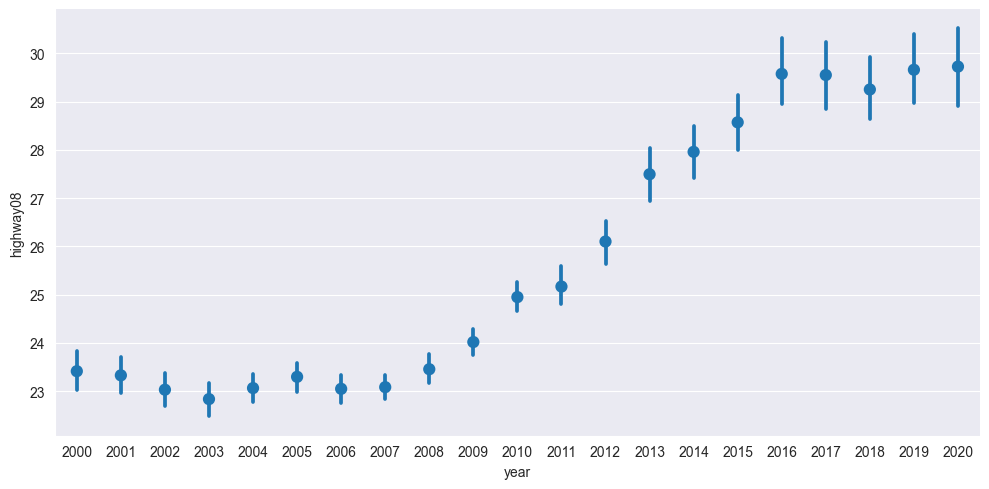

In [54]:
sns.catplot(data=df, x='year', y='highway08', 
            kind='point', aspect=2, join=False);

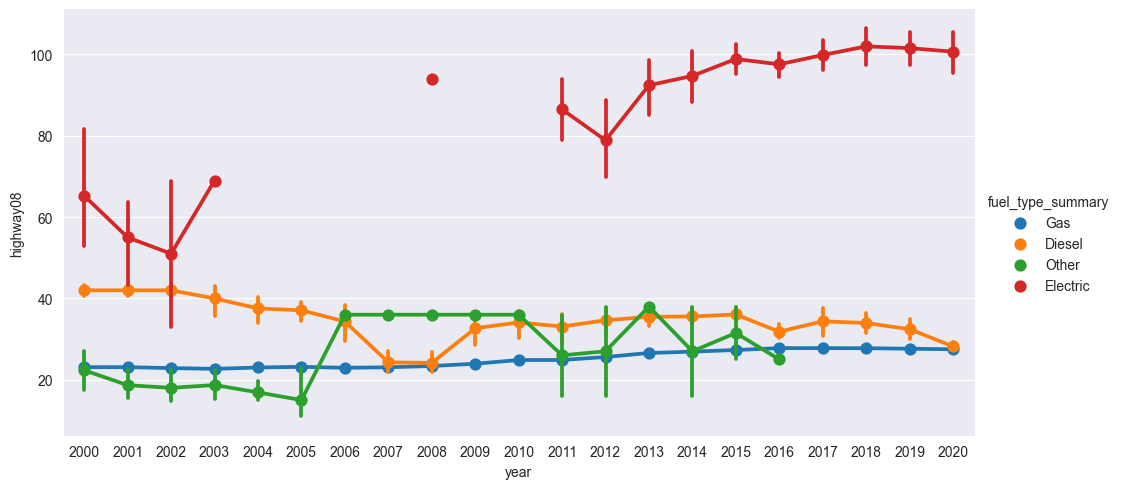

In [55]:
sns.catplot(data=df, x='year', y='highway08', 
            kind='point', aspect=2, hue='fuel_type_summary');

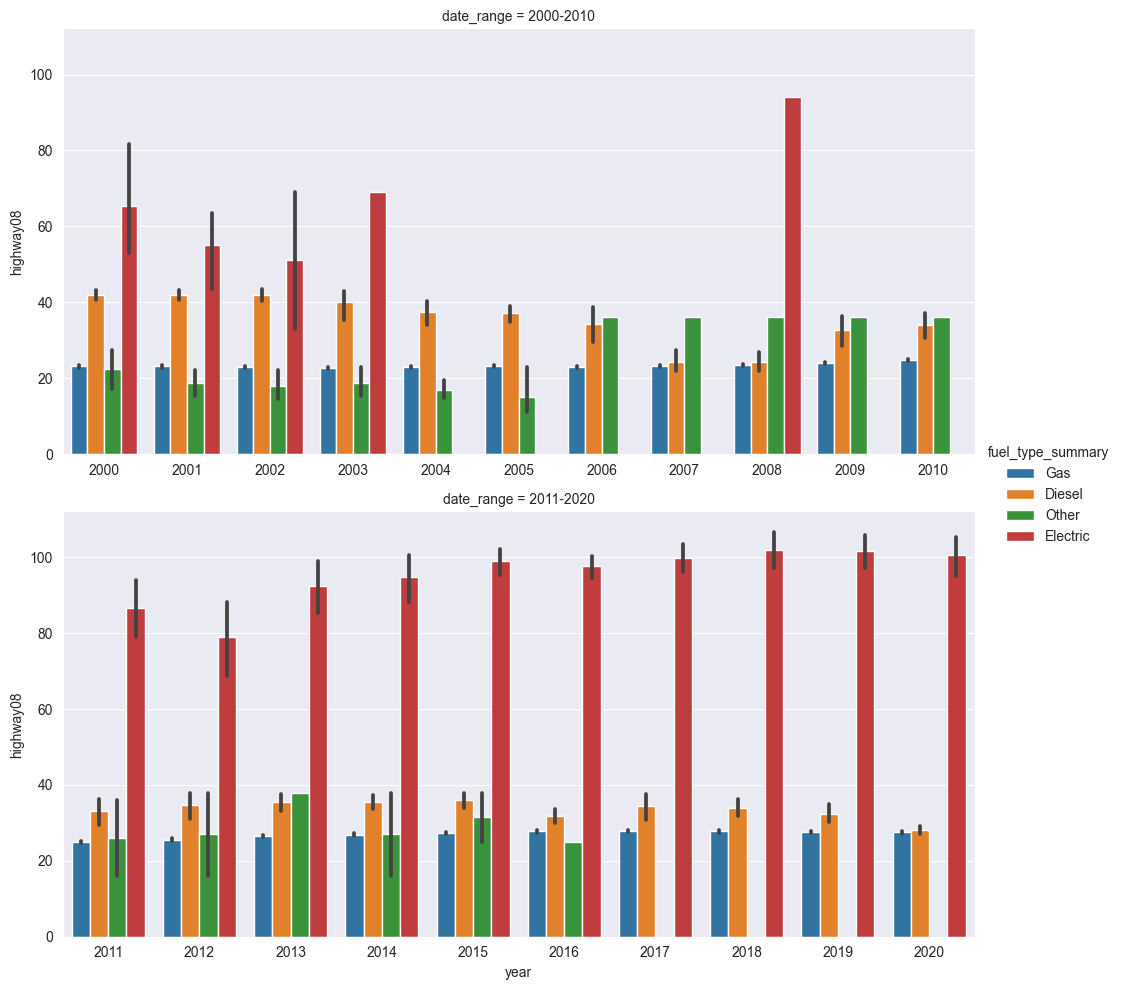

In [59]:
sns.catplot(data=df, x='year', y='highway08', 
            kind='bar', aspect=2, row='date_range',
            hue='fuel_type_summary', sharex=False);

# The Relplot

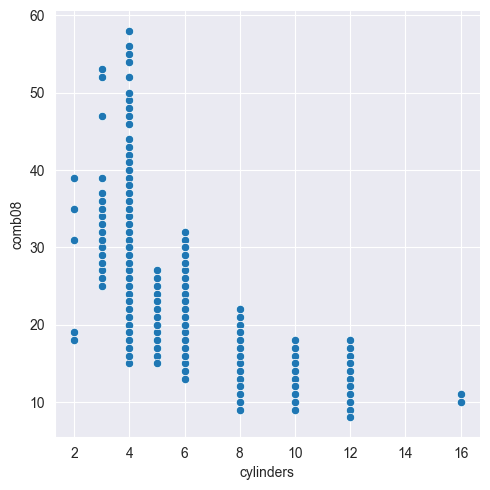

In [16]:
sns.relplot(data=df, x='cylinders', y='comb08');

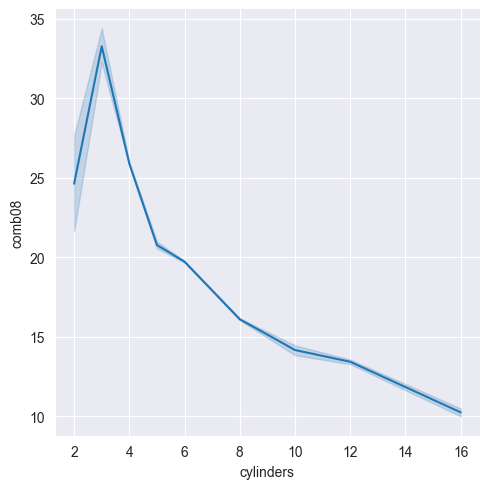

In [18]:
sns.relplot(data=df, x='cylinders', y='comb08', kind='line');

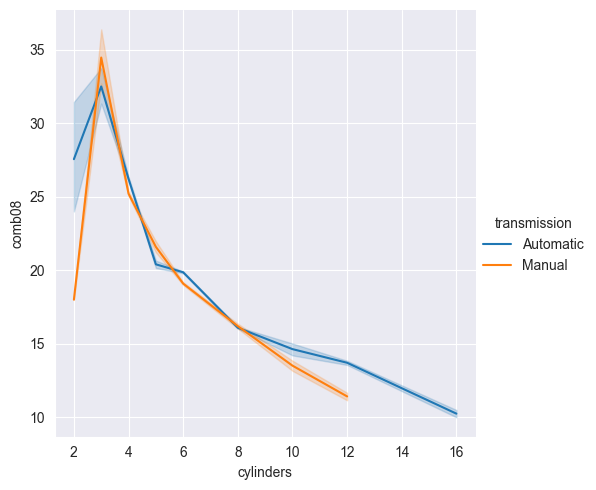

In [19]:
sns.relplot(data=df, x='cylinders', y='comb08', kind='line', hue='transmission');

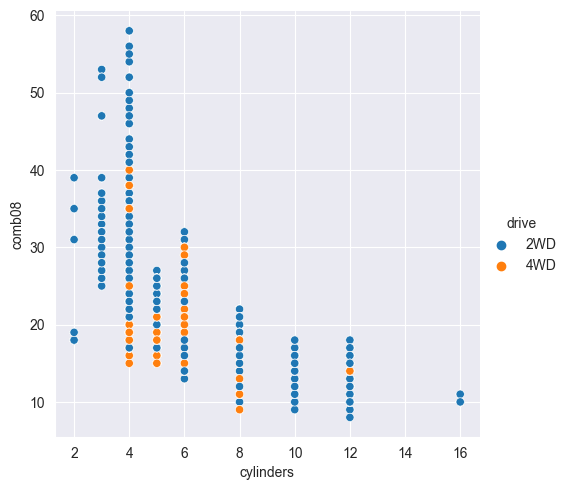

In [40]:
sns.relplot(data=df, x='cylinders', y='comb08', kind='scatter', hue='drive');

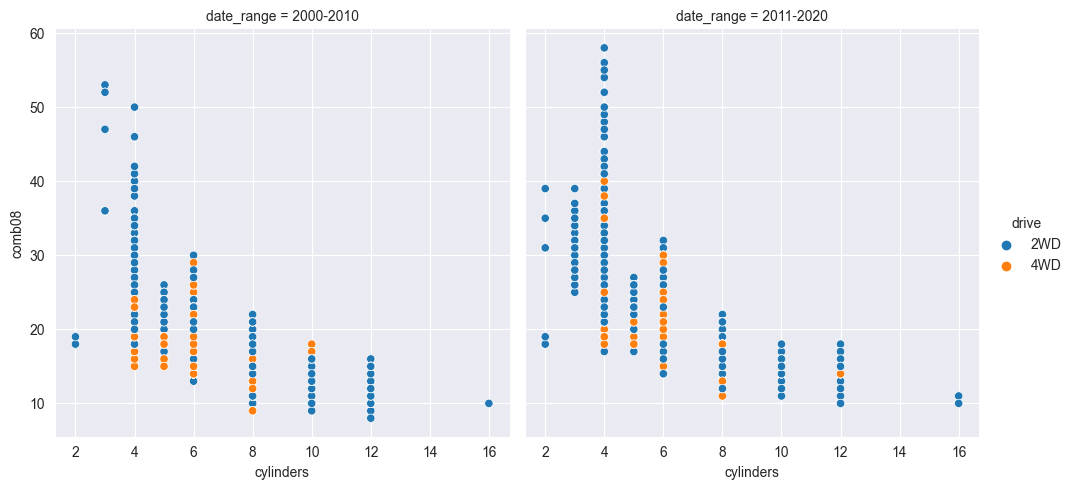

In [41]:
sns.relplot(data=df, x='cylinders', y='comb08', 
            kind='scatter', hue='drive', col='date_range');

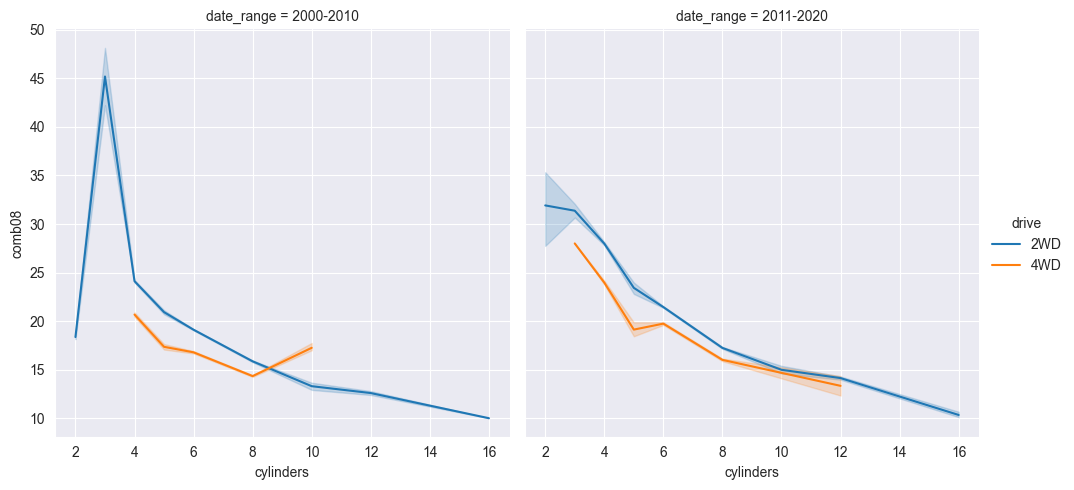

In [42]:
sns.relplot(data=df, x='cylinders', y='comb08', 
            kind='line', hue='drive', col='date_range');

## The Distplot

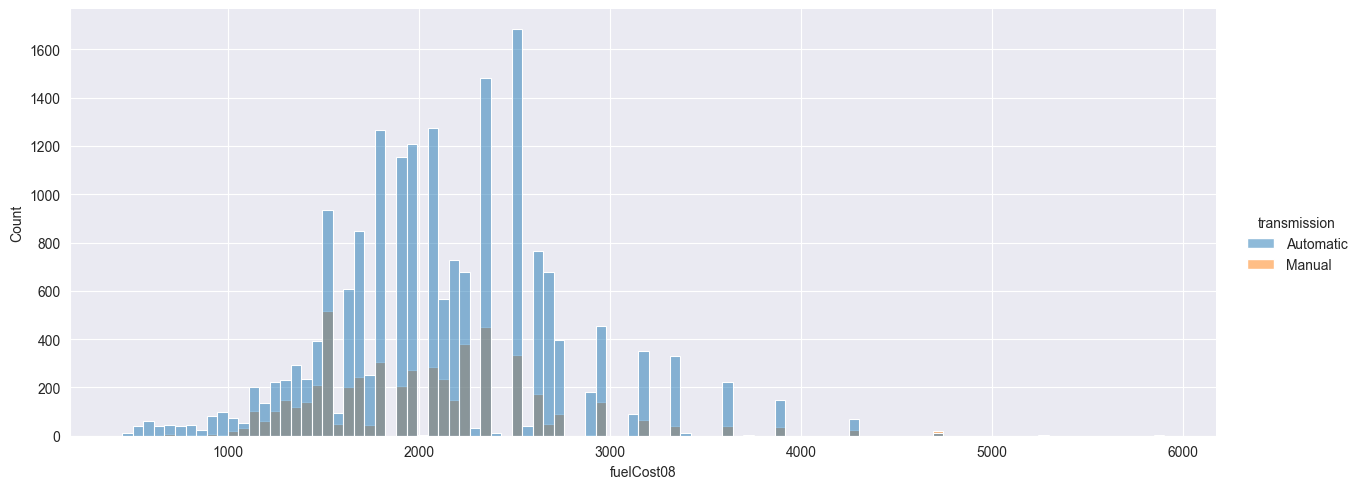

In [21]:
sns.displot(data=df, x='fuelCost08', hue='transmission', aspect=2.5);

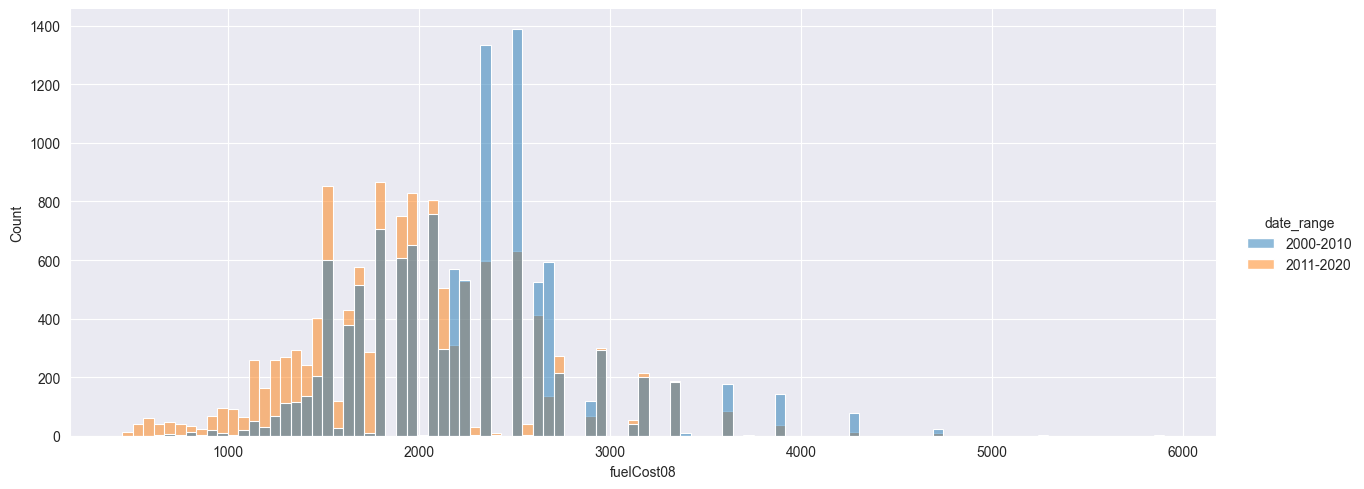

In [33]:
sns.displot(data=df, x='fuelCost08', hue='date_range', aspect=2.5);

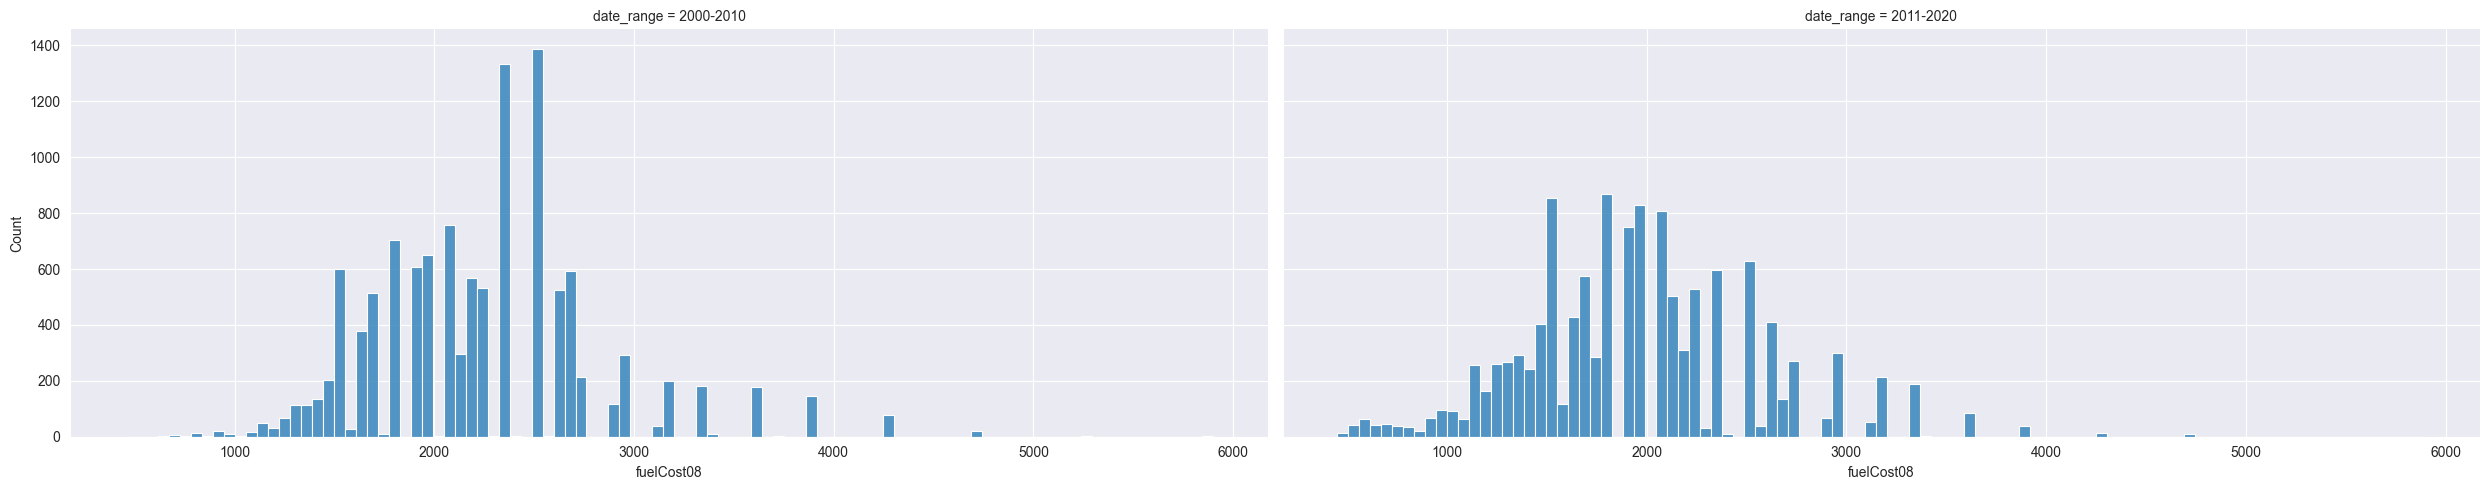

In [34]:
sns.displot(data=df, x='fuelCost08', col='date_range', aspect=2.5);

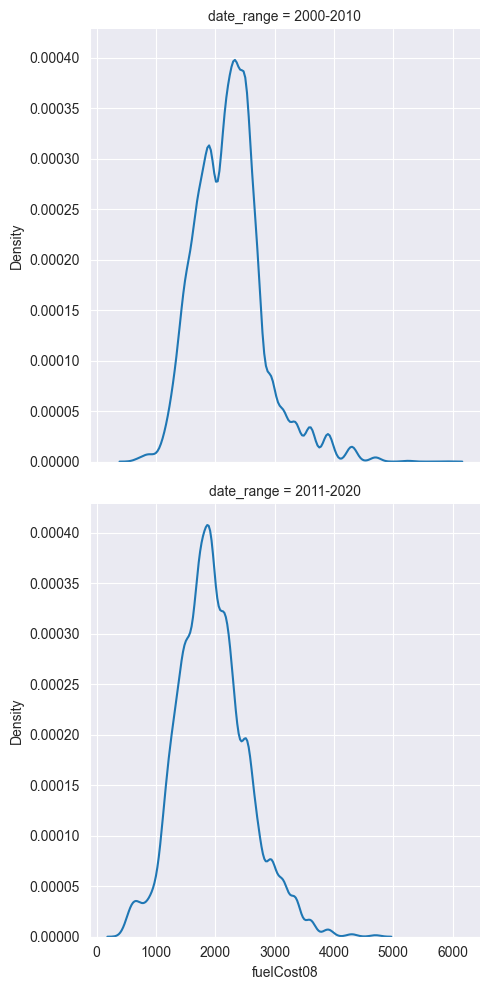

In [37]:
sns.displot(data=df, x='fuelCost08', row='date_range', kind='kde');

## Heatmap

In [61]:
tab = pd.crosstab(df['class_summary'],
                  df['fuel_type_summary'],
                  values=df['comb08'],
                  aggfunc='mean'
                  )

tab

fuel_type_summary,Diesel,Electric,Gas,Other
class_summary,,,,
Car,32.891156,106.530864,22.502994,24.500000
Other,22.000000,62.000000,16.970615,12.333333
Pickup,23.133333,57.333333,17.002950,11.888889
SUV,24.216495,84.632653,19.435003,NaN
Wagon,32.818182,111.000000,23.422427,NaN


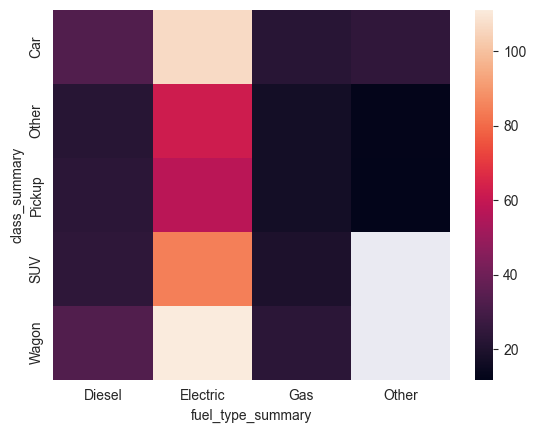

In [63]:
sns.heatmap(tab);

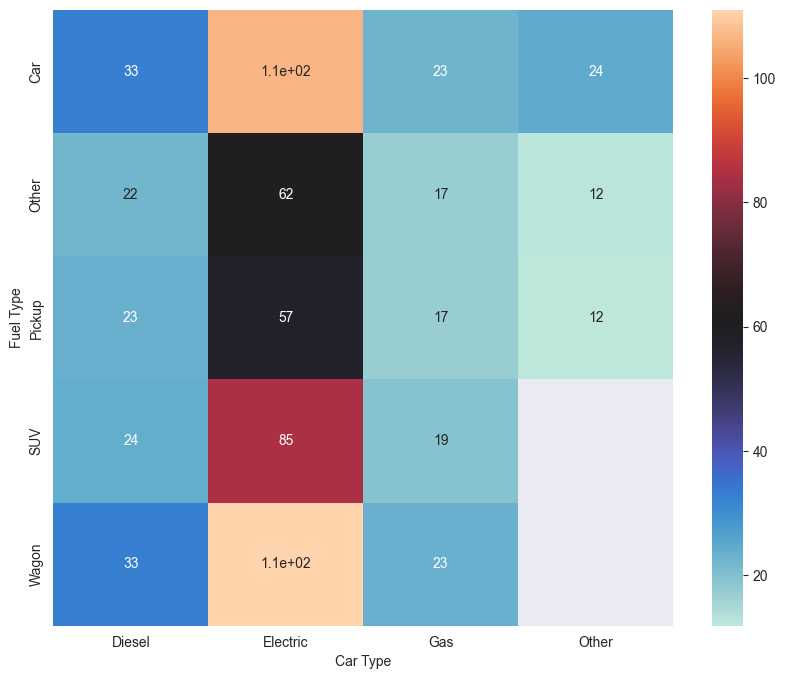

In [80]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(tab, cmap='icefire', annot=True, ax=ax);
ax.set_xlabel('Car Type');
ax.set_ylabel('Fuel Type');

## The Pair Plot

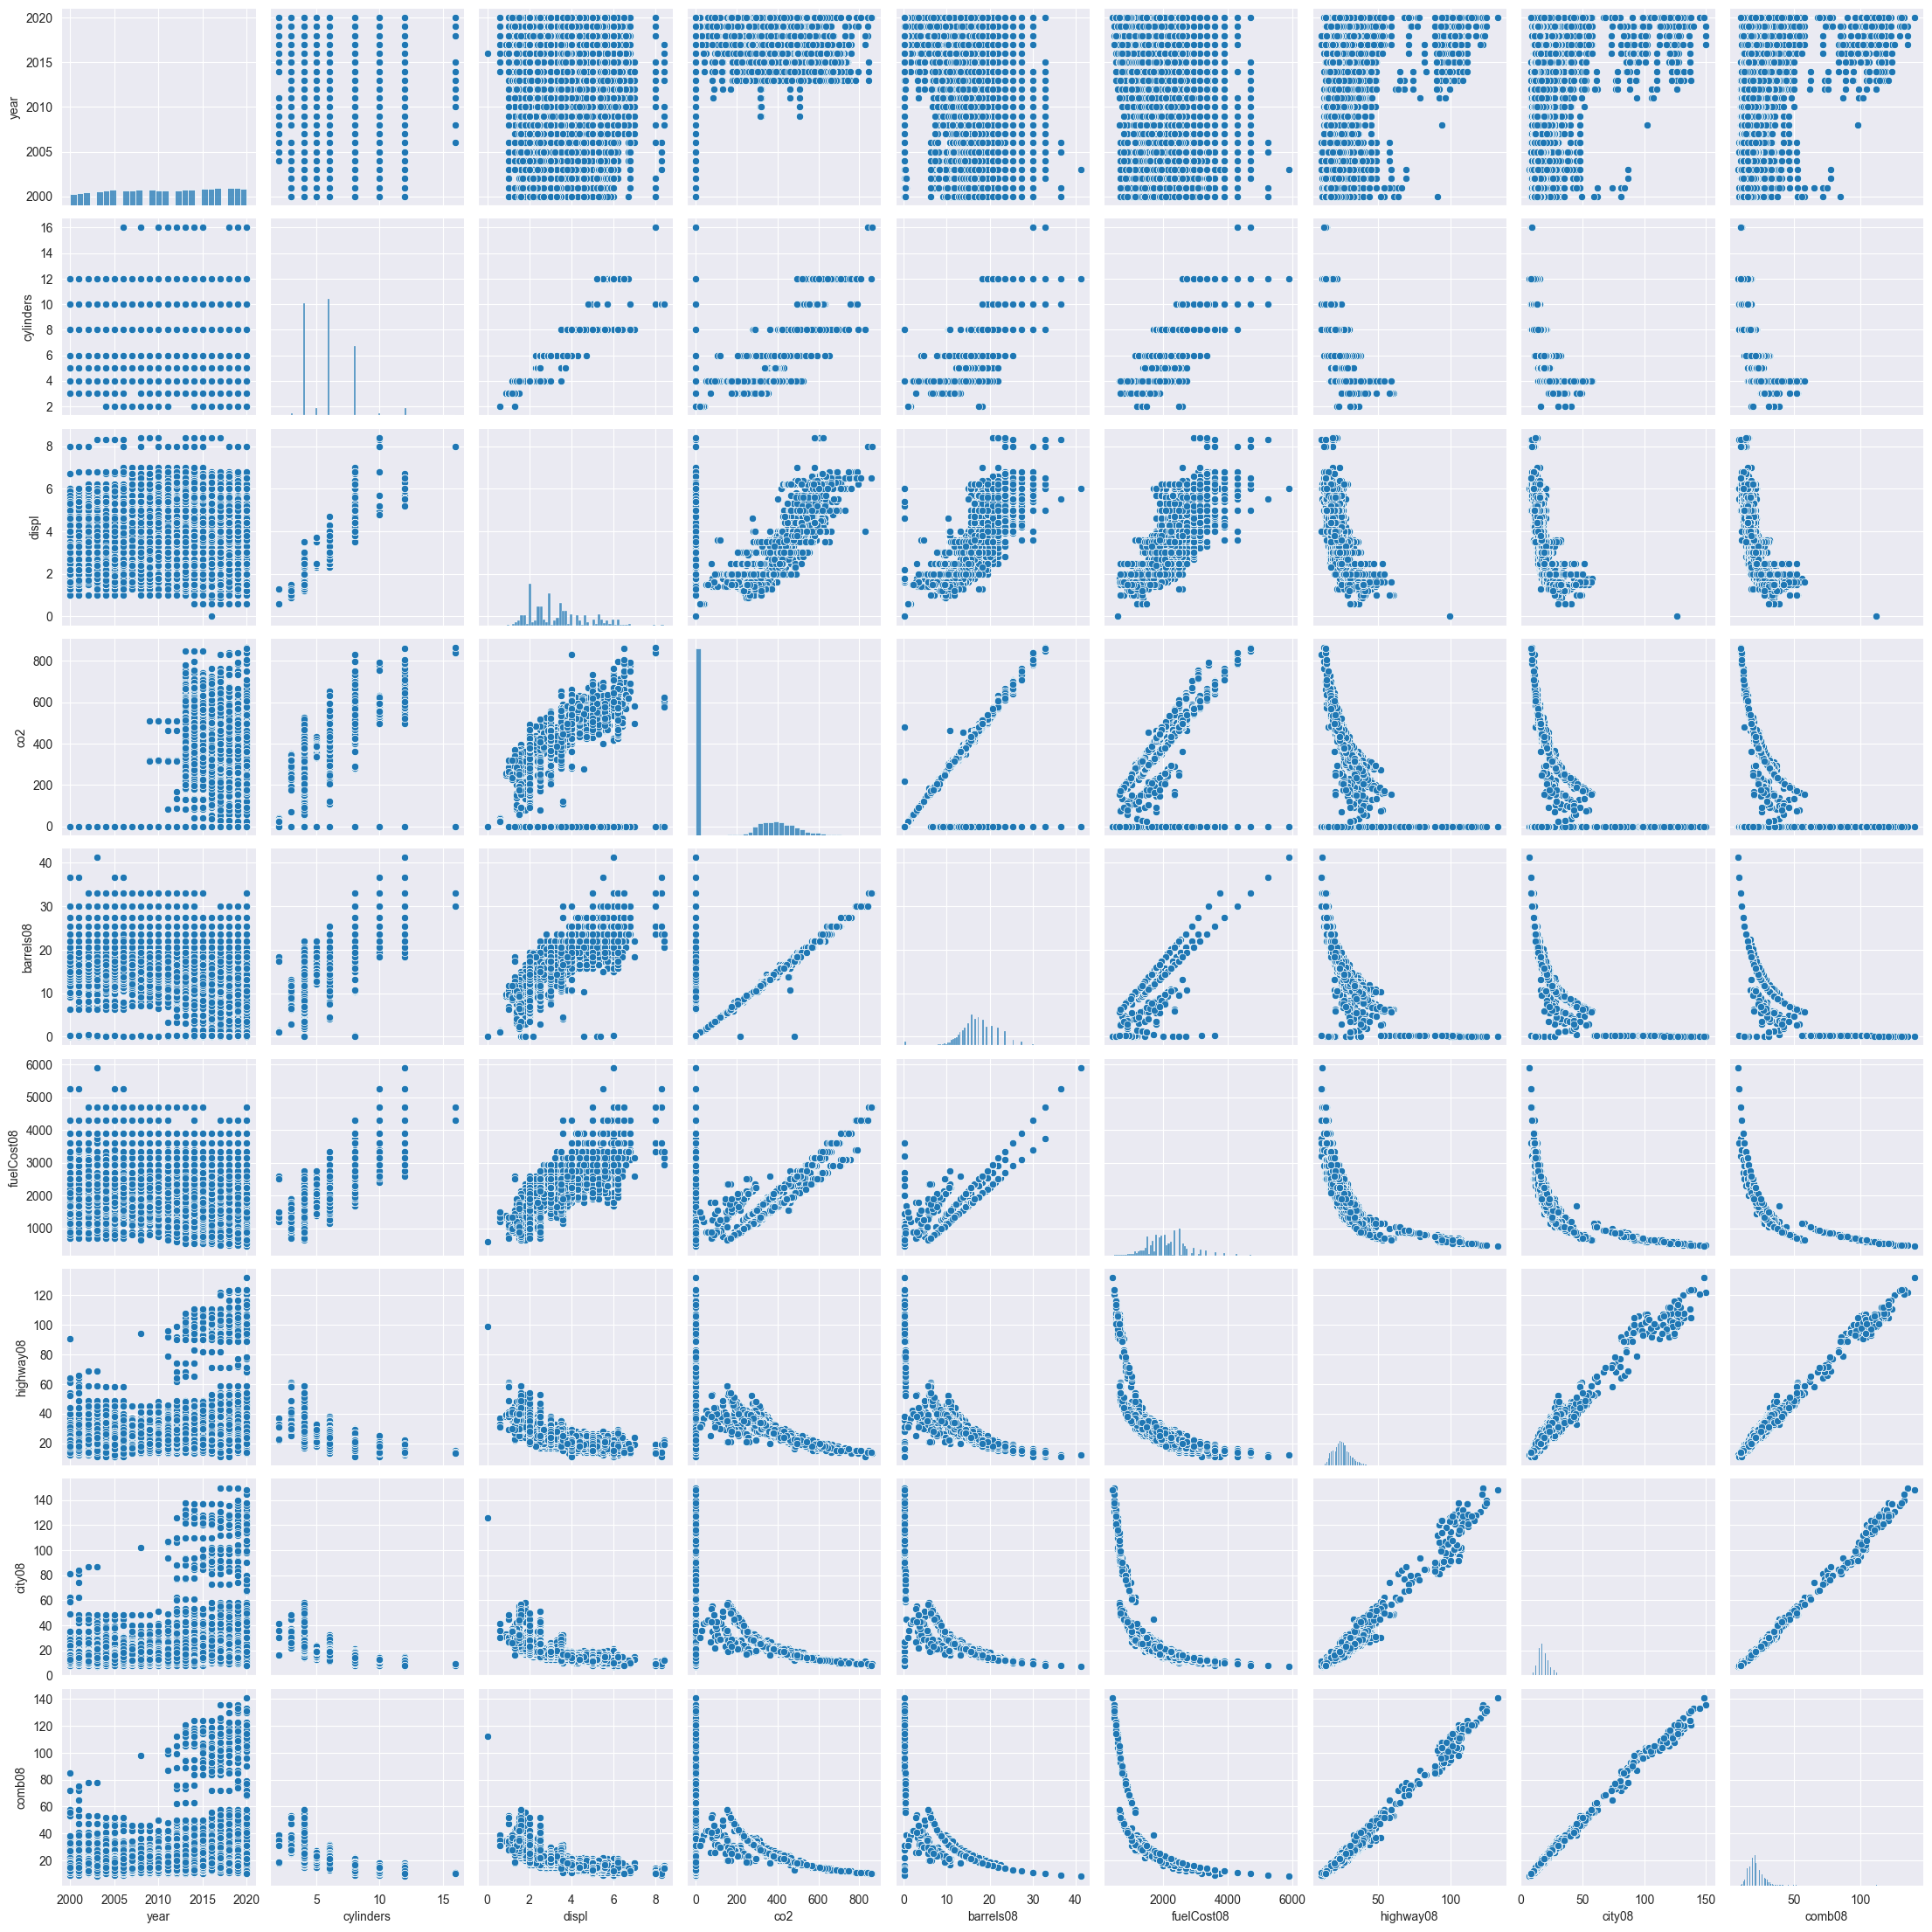

In [81]:
sns.pairplot(df)

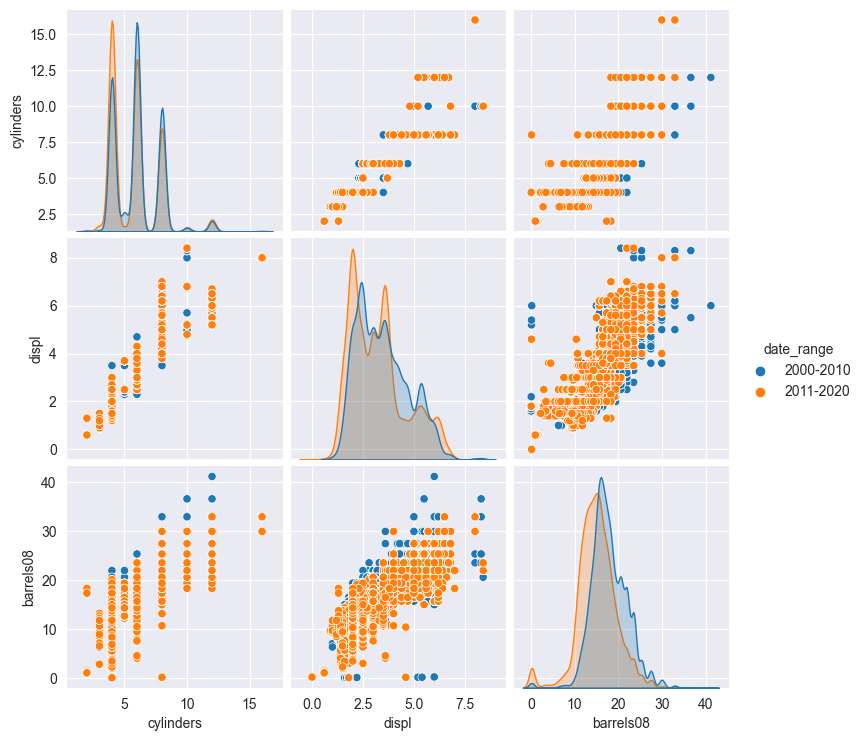

In [83]:
# Specify Pairplot Variables

sns.pairplot(data=df, x_vars=['cylinders', 'displ', 'barrels08'],
             y_vars=['cylinders', 'displ', 'barrels08'],
             hue='date_range'
             )

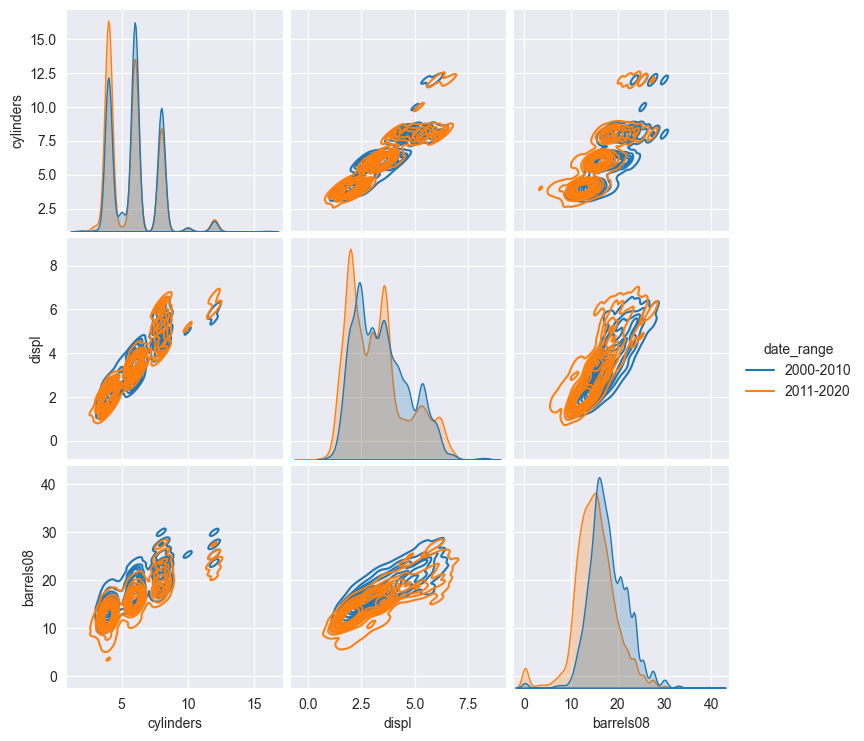

In [84]:
# Specify Pairplot Variables

sns.pairplot(data=df, x_vars=['cylinders', 'displ', 'barrels08'],
             y_vars=['cylinders', 'displ', 'barrels08'],
             hue='date_range', kind='kde'
             )

## Jointplot

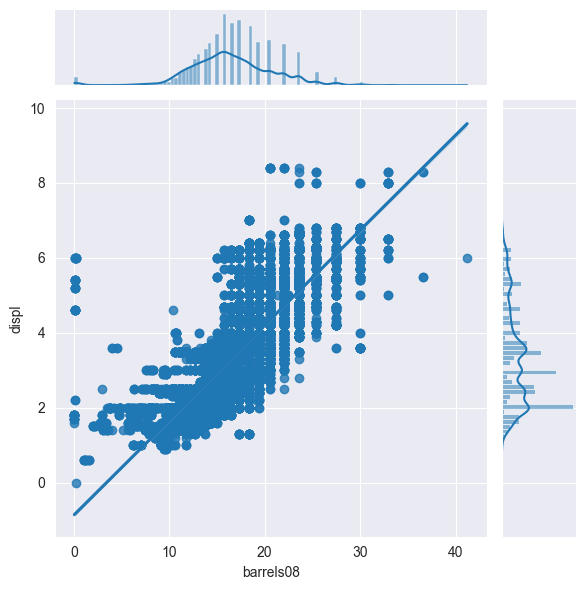

In [86]:
sns.jointplot(data=df, x='barrels08', y='displ', kind='reg');

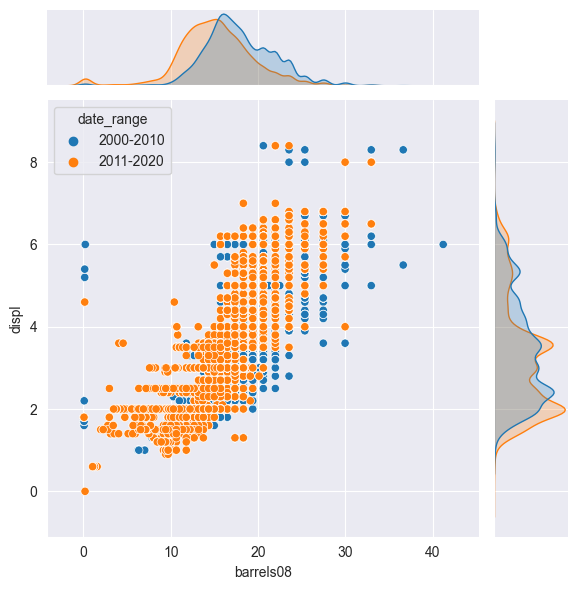

In [87]:
sns.jointplot(data=df, x='barrels08', y='displ', hue='date_range');

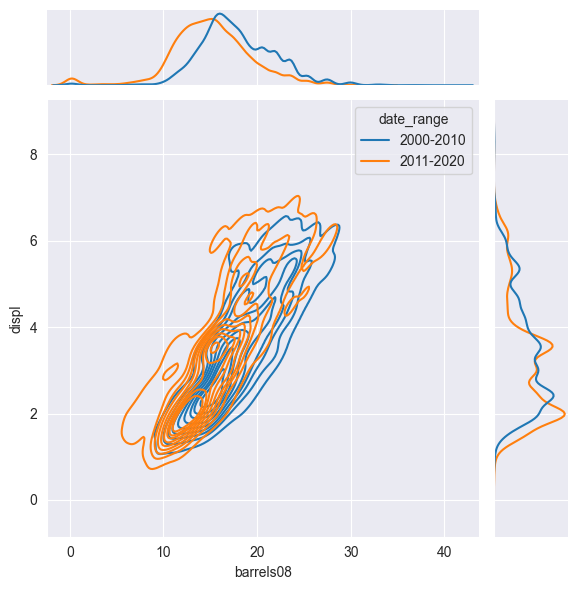

In [88]:
sns.jointplot(data=df, x='barrels08', y='displ', hue='drive', kind='kde');
